In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
%matplotlib inline
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
X,y=mglearn.datasets.make_forge()

axis Figure(720x216)


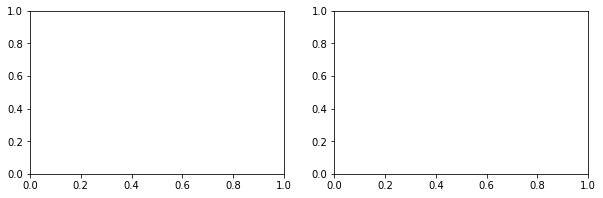

In [55]:
fig,axes=plt.subplots(1,2,figsize=(10,3))
print("axis",fig)

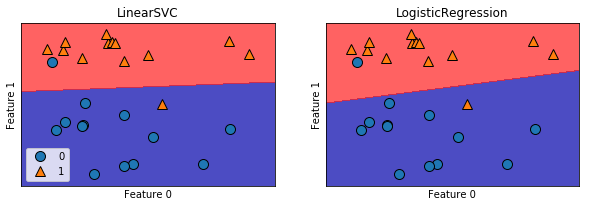

In [68]:
fig,axes=plt.subplots(1,2,figsize=(10,3))
# fig is the object that it returns and axes is the figures, By default both applies L2 regularization
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,ax=ax, alpha=.7)
#     ax sets the axes . fil fills up the backgrnd , eps changes position of data point , kind of zoom in-out,
# clf sets the decision boundary
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [51]:
svmc=LinearSVC()
svmc.fit(X,y)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [28]:
# svmc.__class__.__name__
?svmc

In [59]:
list(zip([1,2],[3,4]))
# b=a

[(1, 3), (2, 4)]

# Breast CAncer Dataset

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(\
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg=LogisticRegression().fit(X_train,y_train)

print("Train score",logreg.score(X_train,y_train))
print("Test score",logreg.score(X_test,y_test))

Train score 0.955399061033
Test score 0.958041958042


Test score 0.958041958042


In [16]:
# default value of C=1 provides quite good performance. By default L2 regularization
# The default value of C=1 provides quite good performance, with 95% accuracy on
# both the training and the test set. But as training and test set performance are very
# close, it is likely that we are underfitting.

In [17]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [18]:
# Using C=100 results in higher training set accuracy, and also a slightly increased test
# set accuracy, confirming our intuition that a more complex model should perform
# better.

In [26]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


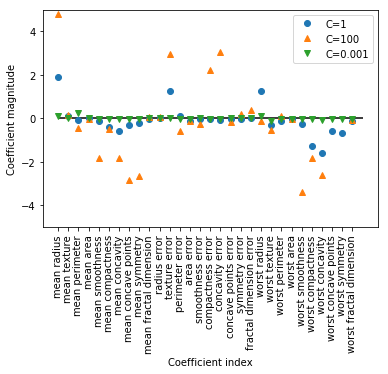

In [36]:
# Values of coefficients
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [33]:
# logreg.coef_.shape

(1, 30)

In [22]:
# If we increase the value of lambda i.e decrease the value of C (.001)the model complexity decreases 
# (Stronger regularization applied) ,it will generalize better on test dataset
# If we decrease the value of lambda i.e increase the value of C(100)
# the model complexity increases and its able to learn more complex
# descision boundary in training dataset
# 

In [23]:
# https://github.com/rasbt/python-machine-learning-book/blob/master/faq/regularized-logistic-regression-performance.md